In [64]:
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
def get_mse_mean_std(file_pattern):
    """
    Reads HDF5 files matching the given pattern, calculates the mean and standard deviation
    of average test metrics, and returns them along with the transmitted bits.
    
    Args:
        file_pattern (str): The pattern for the filenames to match, e.g., "./results/school_Sheaf-FMTL-subgraph_*.h5"
        
    Returns:
        transmitted_bits (np.array): Array of transmitted bits per iteration.
        mse_mean (np.array): Mean of MSE values across files.
        mse_std (np.array): Standard deviation of MSE values across files.
    """
    all_average_test_metrics = []
    transmitted_bits = None  # To store transmitted bits, assumed to be consistent across files

    # Loop through each file that matches the pattern
    for filename in glob.glob(file_pattern):
        with h5py.File(filename, 'r') as hf:
            # Load data from the file
            average_test_metrics = hf['average_test_metrics'][:]
            transmitted_bits = hf['transmitted_bits_per_iteration'][:]  # Consistent across files
            
            # Collect average test metrics from each file
            all_average_test_metrics.append(average_test_metrics)

    # Convert list of arrays to a 2D numpy array (N files x M data points per file)
    all_average_test_metrics = np.array(all_average_test_metrics)

    # Calculate mean and standard deviation across files
    mse_mean = np.mean(all_average_test_metrics, axis=0)
    mse_std = np.std(all_average_test_metrics, axis=0)

    return transmitted_bits, mse_mean, mse_std



# After fixing the bug

# School dataset, Communication Budget effect

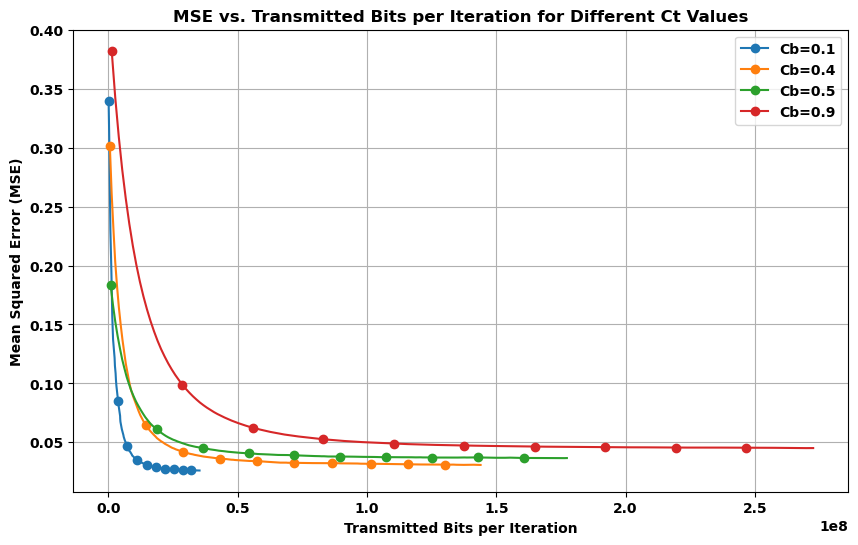

In [21]:
# Define file patterns for different Ct values
file_patterns = {
    "Cb=0.1": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.1_time_*_K_200.h5",
    "Cb=0.4": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.4_time_*_K_200.h5",
    "Cb=0.5": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.5_time_*_K_200.h5",
    "Cb=0.9": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.9_time_*_K_200.h5"
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(transmitted_bits, mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(transmitted_bits, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Transmitted Bits per Iteration for Different Ct Values")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
#plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()

In [19]:
# School dataset, Communication Budget effect

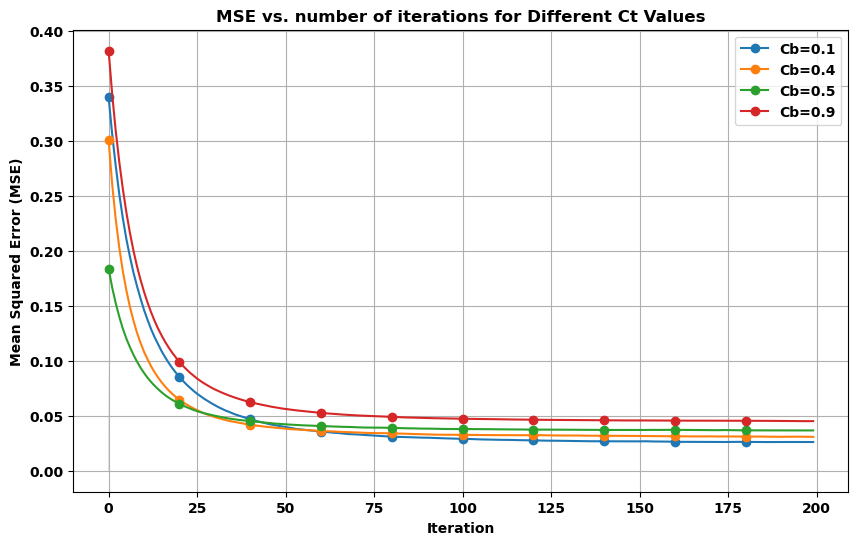

In [22]:
# Define file patterns for different Ct values
file_patterns = {
    "Cb=0.1": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.1_time_0_K_200.h5",
    "Cb=0.4": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.4_time_0_K_200.h5",
    "Cb=0.5": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.5_time_0_K_200.h5",
    "Cb=0.9": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.9_time_0_K_200.h5"
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    
    # Plot mean with standard deviation
    plt.plot(mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(mse_mean - 5 * mse_std, mse_mean + 5 * mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. number of iterations for Different Ct Values")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
#plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()

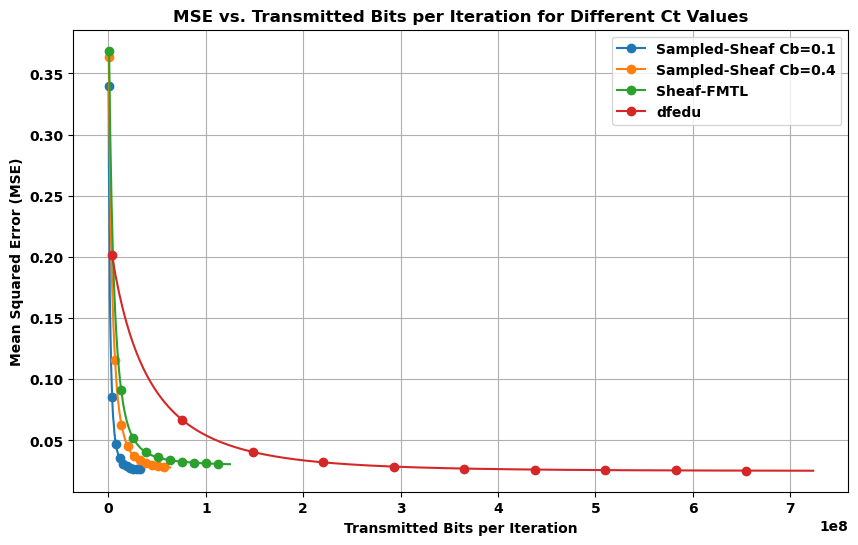

In [46]:
# Define file patterns for different Ct values
file_patterns = {
    "Sampled-Sheaf Cb=0.1": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_0_K_200.h5",
    "Sampled-Sheaf Cb=0.4": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.4_time_0_K_200.h5",
    "Sheaf-FMTL": "./results/school_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_0_K_200.h5",
    "dfedu": "./results/school_dFedU_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_0.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(transmitted_bits, mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(transmitted_bits, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Transmitted Bits per Iteration for Different Ct Values")
plt.legend()
plt.grid(True)
#plt.savefig("MSE_vs_Transmitted_Bits_baselines.pdf", format="pdf")
plt.show()

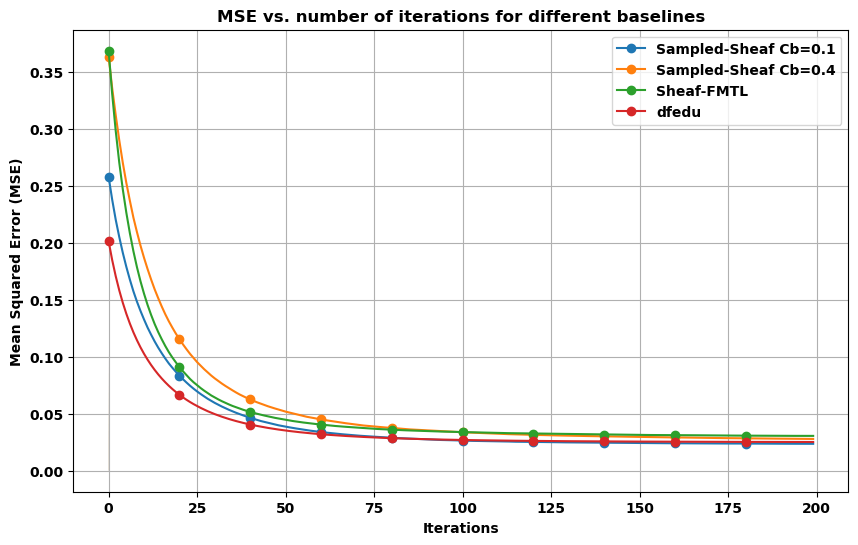

In [49]:
# Define file patterns for different Ct values
file_patterns = {
    "Sampled-Sheaf Cb=0.1": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_0_K_200.h5",
    "Sampled-Sheaf Cb=0.4": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.4_time_0_K_200.h5",
    "Sheaf-FMTL": "./results/school_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_0_K_200.h5",
    "dfedu": "./results/school_dFedU_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_0.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot( mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between( mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
# Label the plot
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. number of iterations for different baselines")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
#plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()

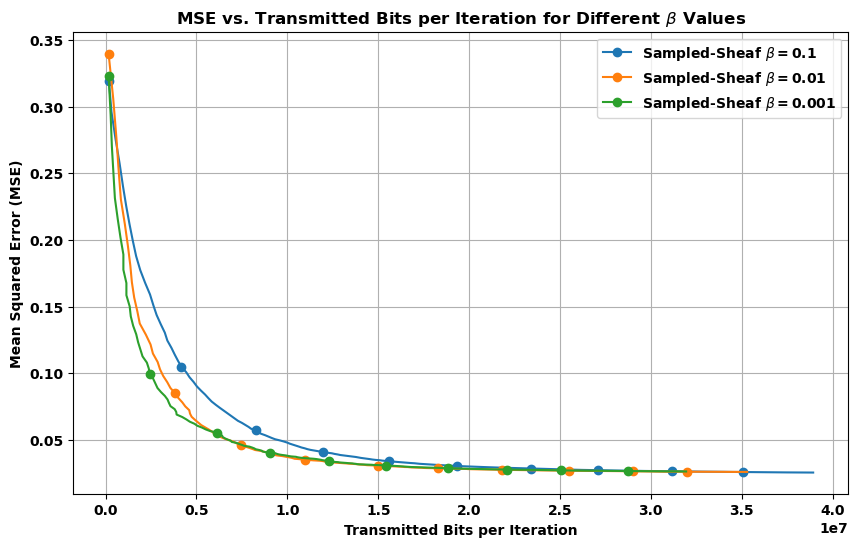

In [50]:
# Define file patterns for different Ct values
file_patterns = {
    r"Sampled-Sheaf $\beta=0.1$": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.1_Ct_0.1_time_*_K_200.h5",
    r"Sampled-Sheaf $\beta=0.01$": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.1_time_*_K_200.h5",
    r"Sampled-Sheaf $\beta=0.001$": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.001_Ct_0.1_time_*_K_200.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(transmitted_bits, mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(transmitted_bits, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(r"MSE vs. Transmitted Bits per Iteration for Different $\beta$ Values")
plt.legend()
plt.grid(True)
plt.savefig("MSE_vs_Transmitted_Bits_beta.pdf", format="pdf")
plt.show()

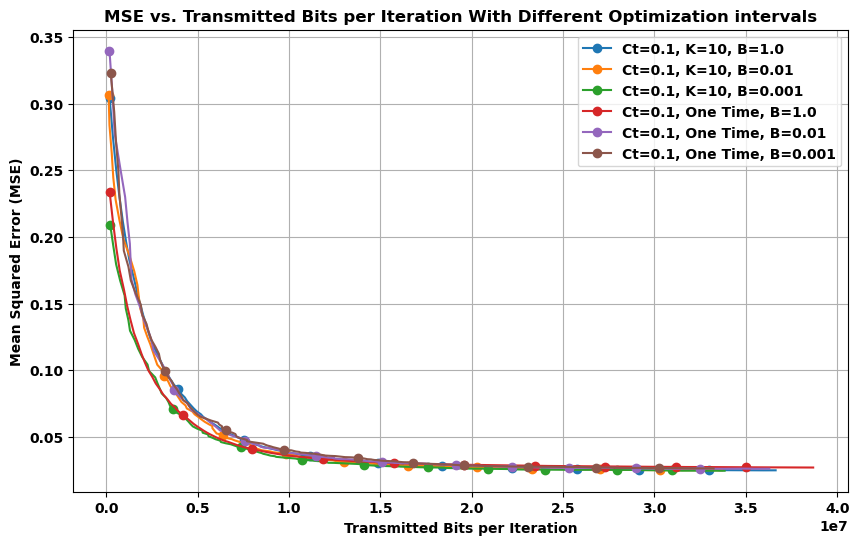

In [51]:
# Define file patterns for different Ct values
file_patterns = {
    "Ct=0.1, K=10, B=1.0": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_1.0_Ct_0.1_time_0_K_10.h5",
    "Ct=0.1, K=10, B=0.01": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.1_time_0_K_10.h5",
    "Ct=0.1, K=10, B=0.001": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.001_Ct_0.1_time_0_K_10.h5",
    "Ct=0.1, One Time, B=1.0": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_1.0_Ct_0.1_time_0_K_200.h5",
    "Ct=0.1, One Time, B=0.01": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.1_time_0_K_200.h5",
    "Ct=0.1, One Time, B=0.001": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.001_Ct_0.1_time_0_K_200.h5",
    #"Cb=0.9": "./results/school_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.4_200_beta_0.01_Ct_0.9_time_*.h5"
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(transmitted_bits, mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(transmitted_bits, mse_mean - 5 * mse_std, mse_mean + 5 * mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Transmitted Bits per Iteration With Different Optimization intervals")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()

# Vehicle dataset

In [ ]:
# Make sure that the dataset is of the same size, 
# Then run another experimetn wher ehte models arenät the same
# If it is of the same size do the opposite
# Run more experiments and plot the mean and std for each curve

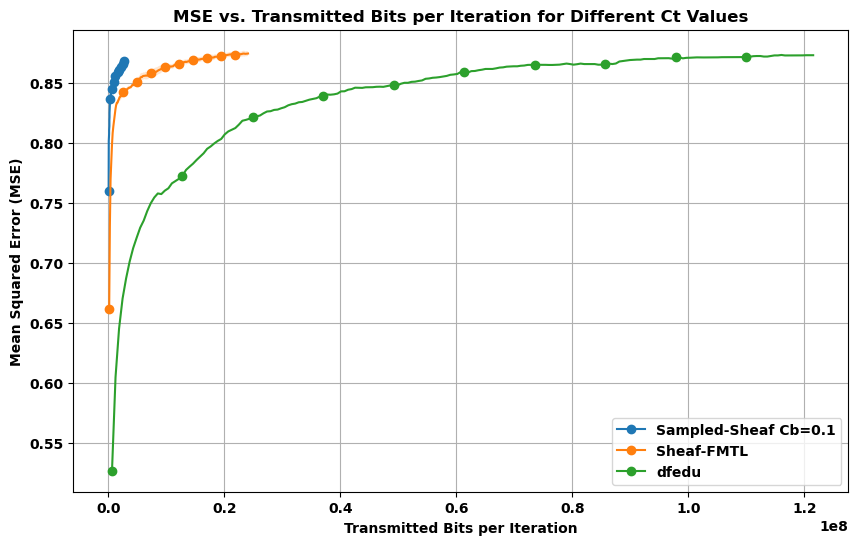

In [56]:
# Define file patterns for different Ct values
file_patterns = {
    "Sampled-Sheaf Cb=0.1": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_*_K_200.h5",
    #"Sampled-Sheaf Cb=0.4": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.4_time_0_K_200.h5",
    "Sheaf-FMTL": "./results/vehicle_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_*_K_200.h5",
    "dfedu": "./results/vehicle_dFedU_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_*_K_200.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(transmitted_bits, mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(transmitted_bits, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Transmitted Bits per Iteration for Different Ct Values")
plt.legend()
plt.grid(True)
#plt.savefig("MSE_vs_Transmitted_Bits_baselines.pdf", format="pdf")
plt.show()

./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_0_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_1_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_2_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_3_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_4_K_200.h5
./results\vehicle_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_0_K_200.h5
./results\vehicle_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_1_K_200.h5
./results\vehicle_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_2_K_200.h5
./results\vehicle_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_3_K_200.h5
./results\vehicle_Sheaf-FMTL_0.001_0.005_0

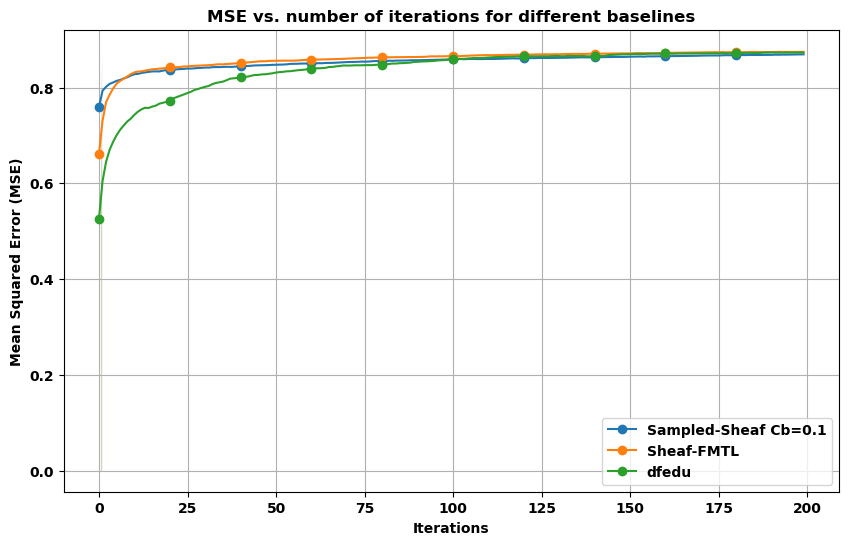

In [65]:
# Define file patterns for different Ct values
file_patterns = {
    "Sampled-Sheaf Cb=0.1": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_*_K_200.h5",
    #"Sampled-Sheaf Cb=0.4": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.4_time_0_K_200.h5",
    "Sheaf-FMTL": "./results/vehicle_Sheaf-FMTL_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.4_time_*_K_200.h5",
    "dfedu": "./results/vehicle_dFedU_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_*_K_200.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    for filename in glob.glob(file_pattern):
        print(filename)
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot( mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between( mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
# Label the plot
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. number of iterations for different baselines")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
#plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()

./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.1_Ct_0.1_time_0_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.1_Ct_0.1_time_1_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.1_Ct_0.1_time_2_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.1_Ct_0.1_time_3_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.1_Ct_0.1_time_4_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_0_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_1_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_2_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_3_K_200.h5
./results\vehic

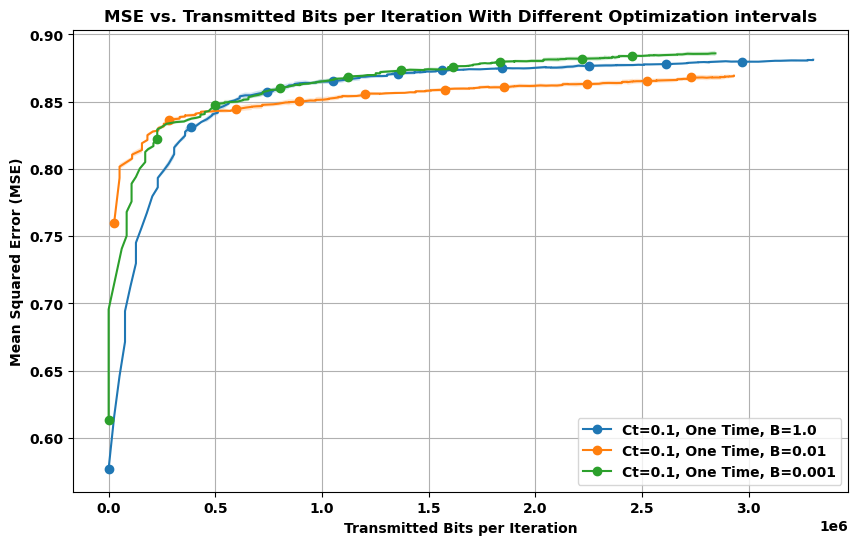

In [67]:
# Define file patterns for different Ct values
file_patterns = {
    "Ct=0.1, One Time, B=1.0": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.1_Ct_0.1_time_*_K_200.h5",
    "Ct=0.1, One Time, B=0.01": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_*_K_200.h5",
    "Ct=0.1, One Time, B=0.001": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.1_time_*_K_200.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    for filename in glob.glob(file_pattern):
        print(filename)
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(transmitted_bits, mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(transmitted_bits, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Transmitted Bits per Iteration With Different Optimization intervals")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()

# Different model sizes and local training

./results\vehicle_local-training_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_0_K_200droppedfeatures_0.h5
./results\vehicle_local-training_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_1_K_200droppedfeatures_0.h5
./results\vehicle_local-training_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_2_K_200droppedfeatures_0.h5
./results\vehicle_local-training_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_3_K_200droppedfeatures_0.h5
./results\vehicle_local-training_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_4_K_200droppedfeatures_0.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_0_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_1_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_2_K_200.h5
./results\vehicle_Sheaf-FMTL-subgraph_0.001_0.005_

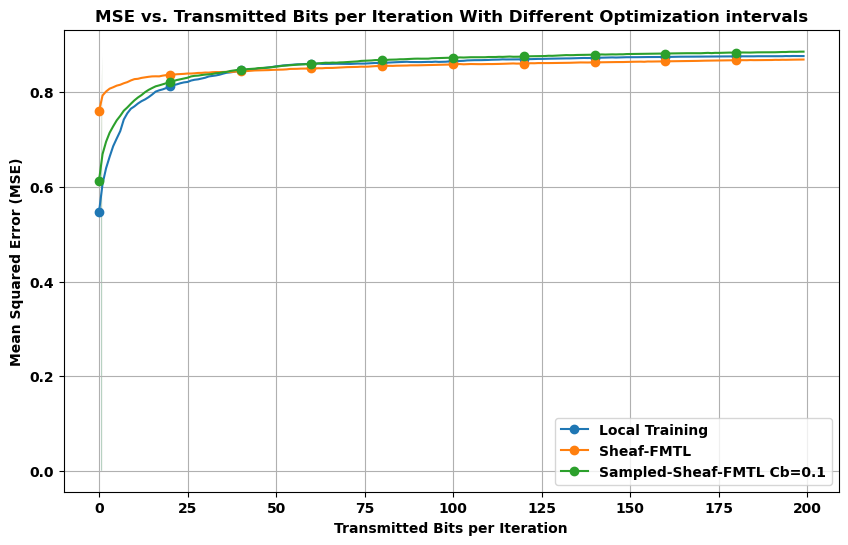

In [68]:
# Define file patterns for different Ct values
file_patterns = {
    "Local Training": "./results/vehicle_local-training_0.001_0.005_0.001_5_0.001_factor_0.3_200_beta_0.01_Ct_1.0_time_*_K_200droppedfeatures_0.h5",
    "Sheaf-FMTL": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.01_Ct_0.1_time_*_K_200.h5",
    "Sampled-Sheaf-FMTL Cb=0.1": "./results/vehicle_Sheaf-FMTL-subgraph_0.001_0.005_0.05_5_0.02_factor_0.2_200_beta_0.001_Ct_0.1_time_*_K_200.h5",
}

# Plotting
plt.figure(figsize=(10, 6))

for label, file_pattern in file_patterns.items():
    # Retrieve transmitted bits, mean MSE, and std MSE for the current pattern
    for filename in glob.glob(file_pattern):
        print(filename)
    transmitted_bits, mse_mean, mse_std = get_mse_mean_std(file_pattern)
    
    # Plot mean with standard deviation
    plt.plot(mse_mean, label=label, marker='o', linestyle='-', markevery=20)
    plt.fill_between(mse_mean - mse_std, mse_mean + mse_std, alpha=0.2)

# Label the plot
plt.xlabel("Transmitted Bits per Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Transmitted Bits per Iteration With Different Optimization intervals")
plt.legend()
plt.grid(True)
# Save the plot as a PDF
plt.savefig("MSE_vs_Transmitted_Bits_Cb.pdf", format="pdf")
plt.show()